การควบคุมเหมาะที่สุดและการเรียนรูู้เสริมกำลัง -- ดร.วโรดม ตู้จินดา

# 3 การควบคุมเหมาะที่สุด

หลังจากที่ได้ศึกษาเกี่ยวกับพื้นฐานการหาค่าเหมาะที่สุดในบทที่ 2 แล้ว ในบทนี้จะเริ่มต้นเข้าสู่การประุยุกต์ใช้งานในสาขาระบบควบคุม 
ซึ่งเป็นสาระสำคัญของหนังสือนี้ ดังที่ได้กล่าวแนะนำในบทแรกแล้วว่า 
แนวทางในการออกแบบและสร้างตัวควบคุมสมัยใหม่แตกต่างจากเดิมที่ใช้ตัวควบคุมที่มีโครงสร้างแน่นอน 
เช่นอยู่ในรูปของการป้อนกลับสถานะหรือเอาต์พุตผ่านอัตราขยายหรือสัมประสิทธิ์ฟังก์ชันถ่ายโอนที่เป็นค่าคงที่ 
โดยตัวควบคุมผ่านการออกแบบโดยวิธีการต่างๆ หรือหากเป็นตัวควบคุม PID 
จะอาศัยการปรับแต่งค่าพารามิเตอร์แบบออฟไลน์โดยผู้ใช้งานเพื่อได้ผลตอบสนองตามต้องการ 
การควบคุมปรับตัว (adaptive control) จะมีความยืดหยุ่นเพิ่มขึ้นโดยสามารถปรับค่าพารามิเตอร์อัตโนมัติในขณะทำงาน 
กล่าวได้ว่าเป็นการเรียนรู้ในรูปแบบหนึ่ง 
โดยบางวิธีการอาจมีความใกล้เคียงกับแนวทางที่นำเสนอในหนังสือนี้แต่อาจไม่ได้ถูกจัดรูปให้มองเห็นความสัมพันธ์อย่างชัดจน 

แท้จริงแล้วแนวทางการควบคุมเหมาะที่สุดมิได้เกิดขึ้นในยุคปัจจุบัน แต่เริ่มต้นตั้งแต่ในสมัยทศวรรษที่ 60 
ของคริสต์ศักราช  เมื่อเริ่มมีการใช้คอมพิวเตอร์ช่วยในการวิเคราะห์และออกแบบระบบควบคุมในรูปปริภูมิสถานะ 
โดยการควบคุมป้อนกลับสถานะที่เรียกว่า ตัวควบคุมกำลังสองเชิงเส้น (linear quadratic regulator) 
ซึ่งต่อไปจะเรียกชื่อย่อว่า LQR ตัวกรองคาลมาน (Kalman filter หรือ KF) หรือรวมกันเรียกว่า 
ตัวควบคุมกำลังสองแบบเกาส์เซียน (linear quadratic gaussian หรือ LQG) ล้วนมีพื้นฐานบนวิธีการหาค่าเหมาะที่สุด 
เพียงแต่สมรรถนะของคอมพิวเตอร์ในสมัยนั้นไม่เพียงพอที่จะแก้ปัญหาเหมาะที่สุดแบบเรียลไทม์ ดังนั้น LQR, KF, LQG 
จะถูกสังเคราะห์แบบออฟไลน์เป็นอัตราขยายหรือฟังก์ชันถ่ายโอนคงที่ และอิมพลิเมนต์เป็นตัวควบคุมป้อนกลับที่ไม่มีการปรับแต่ง 
ในขณะใช้งาน ในขณะที่การแก้ปัญหาเหมาะที่สุดแบบออนไลน์ในการควบคุมแบบทำนายโมเดล (model predictive control หรือ MPC) 
มีการใช้งานจำกัดเฉพาะในระบบที่ตอบสนองช้าเช่นกระบวนการทางเคมี เนื่องจากการหาคำตอบแบบออนไลน์ต้องใช้เวลานาน 

เนื้อหาหลักในบทนี้ยังคงตามรอย [1] เสริมด้วยรายละเอียดจาก [2],[3]

## 3.1 การควบคุมเหมาะที่สุดแบบเชิงกำหนด

ประเด็นสำคัญที่แตกต่างระหว่างตัวควบคุมเหมาะที่สุดกับตัวควบคุมที่อาศัยการปรับแต่งพารามิเตอร์เช่น PID คือ 
ในการควบคุมเหมาะที่สุดเราจะกำหนดดรรชนีที่เป็นตัวชี้วัดว่าตัวควบคุมทำงานได้ดีมากน้อยเพียงใด เช่น 
ความแตกต่างในการตามรอยแนววิถีที่กำหนด ความเร็วในการทำงาน หรือดรรชนีอื่นตามต้องการ 

เริ่มต้นจากปัญหาการควบคุมเหมาะที่สุดแบบเชิงกำหนด (deterministic) 
ที่การหาคำตอบจะคงเดิมโดยไม่คำนึงถึงความไม่แน่นอนในตัวแปรเช่นสัญญาณรบกวน 
การควบคุมแบบเชิงกำหนดยังใช้ประโยชน์ได้มากสำหรับโจทย์ทั่วไปในสาขาระบบควบคุม 
เนื่องจากการรบกวนประเภทต่างๆ มีขนาดเล็กเมื่อเทียบกับสัญญาณคำสั่งอ้างอิง 
ส่วนความไม่แน่นอนในการโมเดลก็มิได้เป็นแบบสโทแคสติก (stochastic)
เพราะค่าผิดพลาดระหว่างพลวัตจริงกับโมเดลไม่ใช่ค่าสุ่ม 

### 3.1.1 รูปแบบปัญหาในโดเมนเวลาต่อเนื่อง

ตัวอย่างของโจทย์ปัญหาการควบคุมเหมาะที่สุดแบบเชิงกำหนดเป็นดังนี้ 
$$
\underset{x(t),u(t)}{min} \; J(x(t),u(t)) = \int_{t_0}^{t_f} l(x(t),u(t))\,dt + l_F(x(t_f))  
$$
$$
s.t. \;\; \dot{x}(t) = f(x(t),u(t)),
$$
$$
\;\; U_{min} \le u(t) \le U_{max} \;\; หรือ \;\; u(t) \in \mathscr{U}, 
$$
$$
\;\; c(x(t)) \ge 0 \tag{3.1}
$$

บรรทัดแรกคือฟังก์ชันมูลค่าซึ่งเป็นตัวชี้วัดสมรรถนะ ประกอบด้วยพจน์แรกที่อยู่ในปริพันธ์เรียกว่า มูลค่าขั้น (stage cost) และพจน์สุดท้ายคือ มูลค่าปลาย (terminal cost)

การหาคำตอบคือคำนวณหาเอาต์พุตตัวควบคุมที่ทำให้ฟังก์ชันมูลค่านั้นน้อยที่สุด ใช้เอาต์พุตนั้นเป็นตัวขับเคลื่อนพลานต์ 
คือระบบที่ต้องการควบคุม 

ดังนั้นพลวัตของพลานต์เป็นเงื่อนไขบังคับสำคัญสำหรับปัญหาการควบคุมเหมาะที่สุด 
ซึ่งจะอยู่ในรูปเงื่อนไขบังคับสมการ นอกจากนั้นอาจมีเงื่อนไขบังคับอสมการเพิ่มเติม เช่นการจำกัดค่าของเอาต์พุตควบคุม เขียนได้ในรูปแบบขอบเขตล่างและบน $U_{min} \le u(t) \le U_{max}$หรือในกรณีทั่วไปคืออยู่ในเซตที่เป็นไปได้ $u(t) \in \mathscr{U}$
ส่วนเงื่อนไขอื่นเช่นการจำกัดค่าสถานะหรือเอาต์พุตเพิ่อมิให้ชนกับสิ่งกีดขวาง เขียนในรูปทั่วไปคือ $c(x(t)) \ge 0$  เพื่อสอดคล้องกับสัญนิยมที่ใช้ในบทที่ 2 โดยหากการจำกัดค่าอยู่ในรูป $\tilde{c}(x(t)) \le 0$ 
เพียงแต่กลับเครื่องหมาย $\tilde{c}(x(t)) = -c(x(t))$ เท่านั้น

**หมายเหตุ :** สำหรับผู้อ่านที่คุ้นเคยกับปัญหาการเรียนรู้เสริมกำลัง (ต่อไปจะเรียกย่อว่า RL)  ประเด็นสำคัญและคำศัพท์ที่แตกต่างพอสรุปได้คือ

* ฟังก์ชันวัตถุประสงค์ในปัญหา RL อยู่ในรูปของรางวัล โดยต้องการหาค่าสูงสุดของรางวัลที่ได้รับ
* เอาต์พุตของตัวควบคุมถูกเรียกว่าการกระทำ (action) หรือนโยบาย (policy)
* พลานต์หรือพลวัตที่ต้องการควบคุมถูกเรียกว่าสภาพแวดล้อม (environment)
* ใช้คำว่า ตัวกระทำ (agent) แทนตัวควบคุม
* การเรียนรู้ในปัญหา RL ส่วนใหญ๋เป็นแบบออฟไลน์ ไม่มีเงื่อนไขเคร่งครัดด้านเวลาในการหาคำตอบ โดยฟังก์ชันวัตถุประสงค์เป็นแบบไม่เป็นเชิงเส้นและมักไม่เป็นแบบคอนเวกซ์ อาจมีตัวแปรตัดสินใจจำนวนมาก 
* ปัญหา RL โดยทั่วไปไม่จำเป็นต้องทำงานบนระบบที่ทรัพยากรจำกัด เช่นระบบฝังตัว   

ข้อสังเกตสำหรับโจทย์ปัญหา (3.1)

* ปัญหาการควบคุมเหมาะที่สุดในโดเมนเวลาต่อเนื่องมักถูกเรียกว่า มิติอนันต์ (infinite dimensional) มีที่มาจากกรณีของระบบดีสครึต (ที่เราจะให้ความสำคัญมากกว่า) จะเรียกแต่ละค่าของตัวแปร $x, u$ ว่า จุดเงื่อน (knot points) เหมือนที่ใช้ในฟังก์ชันเสมือนพหุนาม (spline functions) ในระบบเวลาต่อเนื่องเปรียบได้กับการเพิ่มจุดเงื่อนมากขึ้นจนเข้าสู่อนันต์
* คำตอบจะอยู่ในรูปแนววิถีวงเปิด (open-loop trajectories) ของ $x, u$ โดยไม่มีการควบคุมป้อนกลับ ซึ่งจะแตกต่างจากกรณีสโทแคสติก
* ในบางปัญหาจะได้คำตอบเชิงวิเคราะห์ (analytic solutions) แต่มีไม่มากนัก

### 3.1.2 รูปแบบปัญหาในโดเมนเวลาดีสครีต

ตัวอย่างของปัญหาการควบคุมเหมาะที่สุดในโดเมนเวลาดีสครีตเขียนได้ดังนี้

$$
\underset{x_{1:N},u_{1:N-1}}{min} \; J(x_{1:N},u_{1:N-1}) =  \sum_{k=1}^{N-1}l(x_k,u_k) + l_F(x_N)
$$
$$
s.t. \;\; x_{k+1} = f(x_k,u_k),
$$
$$
\;\; U_{min} \le u_k \le U_{max} \;\; หรือ \;\; u_k \in \mathscr{U} \;\; \forall k, 
$$
$$
\;\; c(x_k) \ge 0 \;\; \forall k \tag{3.2}
$$

โดยคำอธิบายสำหรับพจน์ทั้งหมดสอดคล้องกับกรณีเวลาต่อเนื่อง (3.1) เพียงแต่ค่าตัวแปรอยู่ในรูปของตัวอย่าง (samples) จำนวน $N$ ค่าสำหรับ $x_k$ และ $N-1$ ค่าสำหรับ $u_k$ พลวัตที่เป็นเงื่อนไขสมการและการจำกัดค่าในเงื่อนไขอสมการอยู่ในรูปดีสครีตทั้งหมด 

ข้อสังเกตสำหรับ (3.2)

* ปัญหานี้เรียกว่ามิติจำกัด (finite dimensional)
* ค่าตัวอย่าง $x_k, u_k$ มักถูกเรียกว่าจุดเงื่อน
* การแปลงปัญหาจากเวลาต่อเนื่องเป็นดีสครีตทำได้โดยการประมาณค่าปริพันธ์วิธีต่างๆ เช่น ผลต่างข้างหน้า/ย้อนหลัง การแปลงเชิงเส้นคู่ หรือวิธีรุงเงคุตตา (Runge-Kutta)  
* การแปลงปัญหาจากเวลาดีสครีตเป็นต่อเนื่องทำได้โดยการประมาณค่าในช่วง (interpolation)

### 3.1.3 หลักการค่าต่ำสุดของพอนเทรียกิน

วิธีการแรกในการหาคำตอบเหมาะที่สุดอาศัยหลักการหาค่าต่ำสุดของพอนเทรียกิน (Pontryagin's minimum principle) 
ซึ่งมีต้นกำเนิดจากนักคณิตศาสตร์ชาวรัสเซีย Lev Semyonovich Pontryagin ในปี ค.ศ. 1956 
(ชื่อเรียกในช่วงต้นกำเนิดคือการหาค่าสูงสุดของพอนเทรียกิน) โดยกล่าวถึงการแก้ปัญหาที่เรียกว่าระบบฮามิลโทเนียน (Hamiltonian) 
ซึ่งเป็นปัญหาค่าขอบ 2 จุด (two-point boundary value problem) 
และเป็นเงื่อนไขจำเป็นอันดับหนึ่งสำหรับระบบควบคุมเหมาะที่สุดแบบเชิงกำหนด ในระบบดีสครีตเป็นกรณีพิเศษของเงื่อนไข KKT

**หมายเหตุ :** การอนุพัทธ์ดั้งเดิมกระทำในโดเมนเวลาต่อเนื่องโดยอาศัยแคลคูลัสการแปรผัน (calculus of variation) 
ซึ่งมีความเป็นคณิตศาสตร์ค่อนข้างมาก ดังนั้นแนวทางใน [1] จะอนุพัทธ์ในโดเมนดีสครีต  
และหากต้องการแปลงเป็นผลในเวลาต่อเนื่องทำได้โดยลิมิตขั้นเวลาสู่ศูนย์ วิธีการนี้อาจไม่ถูกใจผู้ที่เคร่งทางคณิตศาสตร์เพราะจะมีปัญหาทางเทคนิคเล็กน้อยเช่นจุดไม่ต่อเนื่องของฟังก์ชัน แต่ไม่ใช่ปัญหาหลักด้านการประยุกตฺ์ใช้งาน 

จาก (3.2) เพื่อความง่ายในการอธิบายจะละทิ้งเงื่อนไขอสมการสำหรับ $x_k$ สร้างลากรานเจียนดังนี้
$$
L = \sum_{k=1}^{N-1}l(x_k,u_k) + \lambda_{k+1}^T(f(x_k,u_k)-x_{k+1})+l_F(x_k) \tag{3.3}
$$

ในการอนุพัทธ์มักจะสร้างพจน์ที่เรียกว่าฮามิลโทเนียน
$$
H(x,u,\lambda) = l(x,u) + \lambda^T f(x,u) \tag{3.4}
$$

เมื่อใช้ค่า $H$ ใน $L$ และใช้กลเม็ดในการดึงพจน์ออกจากผลรวมและเปลี่ยนค่าตัวชี้ จะได้ผลดังนี้ 
$$
L = H(x_1,u_1,\lambda_2) + \left[\sum_{k=2}^{N-1}H(x_k,u_k,\lambda_{k+1})
-\lambda_k^Tx_k\right] + l_F(x_N) - \lambda_N^Tx_N \tag{3.5}
$$

โดยขั้นตอนเดิมเมื่อต้องการใช้วิธีนิวตัน คือหาอนุพันธ์ย่อยของ $L$ เทียบกับ $\lambda_k, x_k, x_N$ และให้เท่ากับศูนย์

$$
\frac{\partial L}{\partial \lambda_k} = \frac{\partial H}{\partial \lambda_k} - x_{k+1} = 
f(x_k, u_k) - x_{k+1} = 0 \tag{3.6}
$$
$$
\frac{\partial L}{\partial x_k} = \frac{\partial H}{\partial x_k} - \lambda_{k}^T = 
\frac{\partial l(x_k,u_k)}{\partial x_k} + 
\lambda_{k+1}^T\frac{\partial f(x_k,u_k)}{\partial x_k} -\lambda_k^T  = 0 \tag{3.7}
$$
$$
\frac{\partial L}{\partial x_N} = \frac{\partial l_F(x_N)}{\partial x_N} - \lambda_N^T = 0 \tag{3.8}
$$

ส่วนสำหรับสมการของ $u_k$ เราจะเขียนในรูปการหาค่าต่ำสุดเพื่อความสะดวกในการจัดการกับเงื่อนไขอสมการ

$$
u_k = \underset{u}{arg min} \; H(x_k, u, \lambda_{k+1})
$$
$$
s.t \;\; u \in \mathscr{U} \tag{3.9}
$$

สรุปจาก (3.6)-(3.9) ได้ความสัมพันธ์ดังนี้

$$
x_{k+1} = \nabla_\lambda H(x_k, u_k, \lambda_{k+1}) \tag{3.10}
$$
$$
\lambda_{k} = \nabla_x H(x_k, u_k, \lambda_{k+1}) \tag{3.11}
$$
$$
u_k = \underset{u}{arg min} \; H(x_k, u, \lambda_{k+1})
$$
$$
s.t \;\; u \in \mathscr{U} \tag{3.12}
$$
$$
\lambda_N = \frac{\partial l_F(x_N)}{\partial x_N} \tag{3.13}
$$

โดยวิธีการหาลิมิต สามารถบรรยายในระบบเวลาต่อเนื่องได้เป็นดังนี้

$$
\dot{x} = \nabla_\lambda H(x, u, \lambda) \tag{3.14}
$$
$$
-\dot{\lambda} = \nabla_x H(x, u, \lambda) \tag{3.15}
$$
$$
u = \underset{u}{arg min} \; H(x, \tilde{u}, \lambda)
$$
$$
s.t \;\; \tilde{u} \in \mathscr{U} \tag{3.16}
$$
$$
\lambda(t_f) = \frac{\partial l_F}{\partial x} \tag{3.17}
$$

ข้อสังเกต

* วิธีการนี้มีรูปแบบของปัญหาค่าขอบ 2 จุด คือหาค่า $x$ ในทิศทางข้างหน้าโดยหาปริพันธ์ของสมการอนุพันธ์
และหาค่า $\lambda$ ในทิศทางย้อนหลังโดยการลดค่าเกรเดียนต์ 
ซึ่งมีอัลกอริทึมหลายประเภทที่ใช้แนวทางนี้ ตัวอย่างหนึ่งคือการแพร่กระจายย้อนหลัง (back propagation) .ในการเรียนรู้เชิงลึก 
* วิธีการนี้มีชื่อเรียกว่า วิธีโดยอ้อม (indirect method) หรือ วิธีการยิงโดยอ้อม (indirect shooting)
* ในระบบเวลาต่อเนื่อง $\lambda(t)$ มีชื่อเรียกว่าแนววิถีสถานะร่วม (costate)
* วิธีการนี้มีข้อด้อยในการคำนวณ โดยใช้เวลามากและประสบปัญหาเชิงเลขในแบบเดียวกับที่พบในโครงข่ายประสาทเทียม 
คือการเพิ่มค่าอย่างมากหรือหายไปของเกรเดียนต์ นอกจากนั้นยังไม่สามารถจัดการกับเงื่อนไขบังคับอสมการได้โดยตรง 
ดังนั้นความนิยมเริ่มลดลงสวนทางกับการพัฒนาด้านคอมพิวเตอร์ เพราะปัจจุบันการคำนวณแบบอื่นเช่นวิธีนิวตันให้ผลดีกว่า


## 3.2 ตัวควบคุมกำลังสองเชิงเส้น

ตัวควบคุมกำลังสองเชิงเส้นหรือ LQR 
เรียกได้ว่าเป็นกรณีพิเศษของการควบคุมเหมาะที่สุดแบบเชิงกำหนดที่มีความสำคัญและมีประโยชน์อย่างยิ่ง 
เนื่องจากสามารถหาคำตอบได้ในรูปปิด (สำหรับปัญหาขั้นพื้นฐานที่ไม่มีเงื่อนไขบังคับอสมการ) รูปแบบของปัญหาเขียนได้ดังนี้

$$
\underset{x_{1:N},u_{1:N-1}}{min} \; J =  
\sum_{k=1}^{N-1}\frac{1}{2}x_k^TQ_kx_k + \frac{1}{2}u_k^TR_ku_k 
+ \frac{1}{2}x_N^TQ_Nx_N
$$
$$
s.t. \;\; x_{k+1} = A_kx_k + B_ku_k, \;\; Q_k \succcurlyeq 0, \;\; R_k \succ 0 \tag{3.18}
$$

โดย $Q_k, R_k$ คือเมทริกซ์ให้ค่าน้ำหนักกับสถานะและเอาต์พุตควบคุมตามลำดับ 
ซึ่งมีคุณสมบัติทำให้ปัญหาเป็นแบบคอนเวกซ์ $Q_k$ 
เป็นแบบกึ่งบวกแน่นอนเพราะเรายอมให้ค่าน้ำหนักของสถานะบางตัวเป็นศูนย์ได้ 
แต่ $R_k$ ต้องเป็นแบบบวกแน่นอนเสมอ เพราะหากไม่มีการให้ค่าน้ำหนักกับเอาต์พุตตัวควบคุม 
ในการคำนวณคำตอบที่มีค่าต่ำสุด อัลกอรึทึมจะโกงในการหาคำตอบโดยการใช้ $u_k$ สูงมากเข้าสู่อนันต์ 
กลายเป็นปัญหาที่สร้างขึ้นอย่างไม่เหมาะสม​ (ill-posed) แม้ในทางปฏิบัติอาจใช้การจำกัดค่า $u$ โดยเงื่อนไขอสมการ แต่เป็นวิธีการที่นอกเหนือจากปัญหา LQR พื้นฐานที่กล่าวถึงในหัวข้อนี้

สำหรับพลวัตที่เป็นเงื่อนไขสมการจะเห็นว่าอยู่ในรูปเชิงเส้น 
ซึ่งอาจเป็นการประมาณค่าจากพลวัตไม่เป็นเชิงเส้นเฉพาะที่รอบจดทำงาน ตัวอย่างเช่นในการควบคุมลูกตุ้มหัวกลับ 
(invert pendulum) สามารถประมาณค่าพลวัต ณ จุดสมดุลที่ไม่เสถียร (เมื่อลูกตุ้มอยู่ในตำแหน่งหัวกลับในแนวดิ่ง) 
เป็นพลวัตเชิงเส้นได้เมื่อการเบี่ยงเบนของมุมก้านต่อมีค่าน้อย และใช้ LQR ในการสร้างสมดุล

จากปัญหา LQR พื้นฐานนี้สามารถขยายได้หลายรูปแบบ เช่นแนวนอนอนันต์ (infinite horizon) สโทแคสติก 
และปัญหา LQR จะเรียกว่าเป็นแบบไม่แปรเปลี่ยนตามเวลา (time invariant) เมื่อเมทริกซ์เป็นค่าคงที่ 
กล่าวคือ $A_k = A, B_k = B, Q_k = Q, R_k = R, \forall k$ เพื่อความง่ายจะใช้ในตัวอย่างด้านล่าง

### 3.2.1 การหาคำตอบโดยวิธีการยิงโดยอ้อม

ในการแก้ปัญหา LQR โดยวิธีการยิงโดยอ้อมที่อธิบายในหัวข้อ 3.1.3 เราใช้ความสัมพันธ์ดังนี้

$$
x_{k+1} = \nabla_\lambda H(x_k, u_k, \lambda_{k+1}) = Ax_k + Bu_k \tag{3.19}
$$
$$
\lambda_k = \nabla_x H(k_k, u_k, \lambda_{k+1}) = Qx_k + A^T\lambda_{k+1} \tag{3.20}
$$
$$
\lambda_N = Q_Nx_N \tag{3.21}
$$
$$
u_k = \nabla_u H(x_k, u_k, \lambda_{k+1}) = 0 \Rightarrow - R^{-1}B^T\lambda_{k+1} \tag{3.22}
$$

เค้าโครงของอัลกอริทึมการยิงโดยอ้อมเป็นดังนี้

<hr>

1. คาดเดาค่าเริ่มต้น $u_{1:N-1}$ โดยอาจเริ่มจากค่าศูนย์ทั้งหมด
2. จำลองโดยการแผ่ออก (rollout) ในทิศทางข้างหน้า เพื่อหาค่า $x_{1:N}$
3. คำนวณย้อนกลับเพื่อหาค่า $\lambda, \Delta u$
4. แผ่ออกค่า $\Delta u$ โดยมีการค้นหาตามเส้น
5. ไปที่ขั้นตอน 3. จนกว่าจะลู่เข้า

    <hr>
    
**ตัวอย่าง 3.1** ต้องการใช้ตัวควบคุม LQR กับระบบปริพันธ์คู่ (double integrator)
$$
\dot{x} = 
\left[\begin{array}{c}
\dot{q} \\
\ddot{q}
\end{array}\right] = 
\left[\begin{array}{cc}
0 & 1 \\
0 & 0 
\end{array}\right] 
\left[\begin{array}{c}
q \\
\dot{q}
\end{array}\right] + 
\left[\begin{array}{c}
0 \\
1
\end{array}\right]u \tag{3.23}
$$
เราอาจมองระบบนี้เป็นเสมือนก้อนอิฐบล็อกที่เลื่อนไปบนพื้นน้ำแข็งโดยไม่มีแรงเสียดทาน 
สถานะ $[q, \dot{q}]^T$ คือค่าตำแหน่งและความเร็วของก้อนอิฐ และ $u$ 
คือแรงที่กระทำ เราสามารถแปลงสมการปริภูมิสถานะนี้เป็นระบบดีสครีตได้เมื่อกำหนดคาบเวลาการสุ่ม $h$
$$
x_{k+1} =  Ax_k + Bu_k = 
\left[\begin{array}{cc}
1 & h \\
0 & 1 
\end{array}\right] 
\left[\begin{array}{c}
q_k \\
\dot{q}_k
\end{array}\right] + 
\left[\begin{array}{c}
\frac{1}{2}h^2 \\
h
\end{array}\right]u_k \tag{3.24}
$$

นำเข้าแพ็กเกจที่ใช้งาน 

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
from numpy.linalg import norm, solve

สร้างพลวัตของพลานต์ (3.24) โดยกำหนดคาบเวลา $h = 0.1$ วินาที

In [3]:
# discrete dynamics
h = 0.1  # time step
A = np.array([[1,h],[0,1]])
B = np.array([0.5*h*h, h]).reshape(2,1)

สร้างเวกเตอร์ช่วงเวลาที่ต้องการพล็อตสถานะตามต้องการ ในตัวอย่างนี้กำหนดเท่ากับ 10 วินาที

In [4]:
n = 2     # number of state
m = 1     # number of controls
Tfinal = 10.0 # final time #try larger values
N = int(Tfinal/h)+1    # number of time steps
thist = np.arange(0,h*(N-1),h)

กำหนดการให้น้ำหนักในฟังก์ชันมูลค่า ทดลองเปลี่ยนค่าได้ตามต้องการ เพียงสอดคล้องเงื่อนไขใน (3.18)

In [5]:
# Cost weights
Q = 1.0*np.eye(2)
R = 0.1
Rmat = np.array(R).reshape(1,1)  # used in solve
Qn = 1.0*np.eye(2)

นิยามฟังก์ชัน J() สำหรับคำนวณมูลค่า และ rollout() ในการคำนวณ $x$ ในทิศทางข้างหน้า

In [6]:
def J(xhist, uhist):
    xend = xhist[:,-1]
    cost = 0.5*xend.T@Qn@xend
    for k in range(N-1):
        xk = xhist[:,k]
        uk = uhist[k]
        cost = cost + 0.5*xk.T@Q@xk + 0.5*uk*R*uk
    return cost

In [7]:
def rollout(xhist, uhist):
    xnew = np.zeros(xhist.shape)
    xnew[:,0] = xhist[:,0]
    for k in range(N-1):
        xnew[:,[k+1]] = A@xnew[:,[k]] + B*uhist[k]
    return xnew

<hr>

**เสริมเคล็ดลับภาษาไพทอน**

การตัดเฉือนเมทริกซ์เป็นเวกเตอร์โดยคงความเป็นสองมิติไว้ สมมุติว่ามีเมทริกซ์ขนาด 2 x 3 

In [7]:
M = np.random.rand(2,3) 
M.shape

(2, 3)

ต้องการตัดเวกเตอร์คอลัมน์แรกมาใช้งาน หากใช้ M[:,0] จะพบว่ารูปเป็นแบบ (2,) ไม่ใช่ (2,1) 

In [17]:
cvec0 = M[:,0]
cvec0.shape

(2,)

ซึ่งเมื่อนำไปคำนวณในสมการเมทริกซ์อาจทำให้ผลไม่ถูกต้องจากการแพร่ (broadcast) 
หากต้องการให้ยังคงรูปสองมิติไว้ ต้องครอบตัวชี้ของมิติที่สองโดย [] ดังนี้

In [15]:
cvec1 = M[:,[0]]
cvec1.shape

(2, 1)

<hr>

คาดเดาค่าเริ่มต้นและคำนวณมูลค่าเริ่มต้น

In [8]:
# Initial condiations
x0 = np.array([[1.0],[0]])
# Initial guess
xhist = np.repeat(x0,N,axis=1)
uhist = np.zeros((N-1))
du = np.ones((N-1))
lambdahist = np.zeros((n,N))

xhist = rollout(xhist, uhist) # initial rollout to get state trajectory
J(xhist,uhist)  # initial cost

50.5

เซลล์ด้านล่างนี้คือการคำนวณตามขั้นตอน 3,4 วนซ้ำในทิศทางย้อนหลังและข้างหน้าจนกว่าจะลู่เข้า 
ซึ่งจะใช้เวลานาน (บนคอมพิวเตอร์ผู้เขียนใช้เวลาร่วมหนึ่งนาที) 

In [9]:
# Warning : This cell takes quite long time to finish
b = 1e-2 #line search tolerance
α = 1.0
iter = 0
while np.max(abs(du))>1e-2: # terminate when gradient is small enough
    # backward pass to compute lambda and du
    lambdahist[:,[N-1]] = Qn @xhist[:,[N-1]]
    for k in range(N-1,0,-1):
        du[k-1] = -(uhist[k-1] + solve(Rmat, B.T@lambdahist[:,[k]]).item())
        lambdahist[:,[k-1]] = Q@xhist[:,[k-1]] + A.T@lambdahist[:,[k]]
        
    # forward pass with line search to compute x
    alpha = 1.0
    unew = uhist + alpha*du
    xnew = rollout(xhist, unew)
    while J(xnew, unew) > J(xhist, uhist) - b*alpha*du.T@du:
        alpha = 0.5*alpha
        unew = uhist + alpha*du
        xnew = rollout(xhist, unew)
    uhist = unew
    xhist = xnew
    iter += 1

ตรวจสอบจำนวนครั้งในการวนรอบ และมูลค่าของคำตอบ

In [10]:
iter

2416

In [11]:
J(xhist,uhist)

6.658621241414692

สร้างฟังก์ชัน plotx() และ plotu() เพื่อ
พล็อตแนววิถีของสถานะและเอาต์พุตตัวควบคุมได้ดังในรูปที่ 3.1 และ 3.2 
จะเห็นได้ว่าจากตำแหน่งเริ่มต้น $x=1$ ลู่เข้าสู่ศูนย์แสดงถึงพฤติกรรมการคุมค่า 
โดยมีกราฟความเร็วที่สอดคล้องกัน
เอาต์พุตตัวควบคุมเริ่มจากค่าลบในช่วงเริ่มต้น สู่ค่าบวกเมื่อต้องการหยุด ณ ตำแหน่งปลาย มีค่ายอดในช่วงเวลาประมาณ $t = 1$ วินาที หลังจากนั้นลู่เข้าสู่ศูนย์

In [12]:
# plotx() and plotu() will be used in later examples
def plotx(t,x):
    plt.figure()
    plt.plot(t,x[0,0:N-1],"b-",thist,xhist[1,0:N-1],'orange')
    plt.xlabel("time (sec)")
    plt.ylabel("x(k)")
    plt.legend(["Position","Velocity"])
    plt.grid(True)
    plt.show()   

def plotu(t,u):
    plt.figure()
    plt.plot(t,u,"m-")
    plt.xlabel("time (sec)")
    plt.ylabel("u(k)")
    plt.grid(True)
    plt.show()        

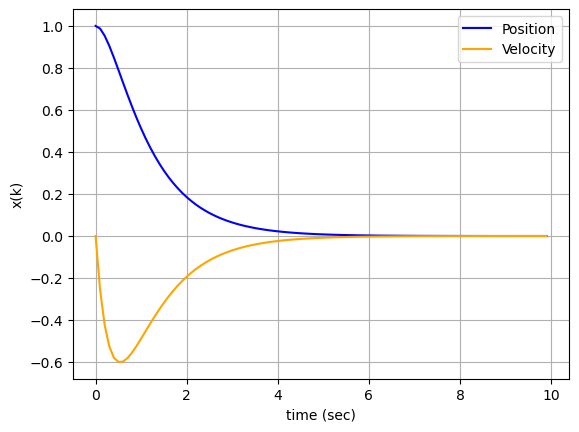

In [13]:
plotx(thist,xhist)

รูปที่ 3.1 แนววิถีของสถานะ $x$ จากตัวควบคุม LQR ในตัวอย่าง 3.1 (วิธีการยิงโดยอ้อม)

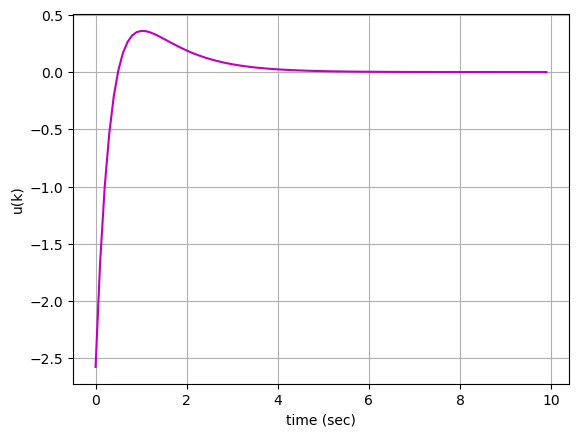

In [14]:
plotu(thist,uhist)

รูปที่ 3.2 แนววิถีของเอาต์พุต $u$ จากตัวควบคุม LQR ในตัวอย่าง 3.1 (วิธีการยิงโดยอ้อม)

หากต้องการรู้สึกถึงข้อด้อยของวิธีนี้ ทดลองเพิ่มช่วงเวลาในการจำลองผลเป็น 10 วินาทีหรือมากกว่า 
จะพบว่าจำนวนการวนซ้ำและเวลาในการคำนวณเพิ่มขึ้นอย่างมาก 
เป็นเหตุผลที่วิธีการยิงโดยอ้อมนี้ได้รับความนิยมน้อยลงในปัจจุบัน 
เนื้อหาต่อไปในบทนี้จะนำเสนอวิธีการอื่นที่ประมวลผลได้เร็วกว่า

### 3.2.2 การหาคำตอบโดยการโปรแกรมกำลังสอง

เราได้ศึกษาวิธีการโปรแกรมกำลังสอง (quadratic program ต่อไปจะเรียกย่อว่า QP) แล้วในบทที่ 2 
คือในกรณีที่ฟังก์ชันมูลค่าเป็นแบบกำลังสอง และเงื่อนไขบังคับเป็นสมการเชิงเส้น ดังนั้นจึงเหมาะสมอย่างยิ่งในการแก้ปัญหา LQR (3.18) 
เนื่องจากรูปแบบของโจทย์ปัญหาสอดคล้องกันทำให้สามารถหาคำตอบได้อย่างมีประสิทธิภาพ 

จากปัญหา LQR (3.18) ต้องการจัดรูปใหม่เพื่อใช้วิธี QP กำหนดสถานะเริ่มต้น $x_1$ ซึ่งเป็นค่าที่เราเลือก มิใช่ตัวแปรการตัดสินใจ
ดังนั้นนิยามเวกเตอร์ของตัวแปรการตัดสินใจดังนี้
$$
z = \left[\begin{array}{c}
u_1 \\
x_2 \\
u_2 \\
\vdots \\
x_{N-1} \\
u_{N-1}  \\
x_N \end{array}\right] \tag{3.25}
$$

นิยามเมทริกซ์น้ำหนัก 
$$
H = \left[\begin{array}{ccccc}
R_1 & 0 & \cdots & \cdots & 0 \\
0 & Q_2 & 0 & \cdots & 0 \\
0 & 0 & R_2 & 0 & 0 \\
0 & \cdots & 0 & \ddots & 0 \\
0 & \cdots & \cdots & 0 & Q_N
\end{array}\right] \tag{3.26}
$$

จะเห็นว่าเราสามารถแทนฟังก์ชันมูลค่าใน (3.18) ในรูปที่กระชับขึ้นดังนี้
$$
J = \frac{1}{2}z^THz \tag{3.26}
$$

ใช้การจัดรูปลักษณะเดียวกันนี้กับเงื่อนไขบังคับที่เป็นพลวัตเชิงเส้นใน (3.18)
$$
\left[\begin{array}{ccccccc} 
B_1 & -I & 0 & \cdots & \cdots & \cdots & 0 \\
0 & A_2 & B_2 & -I & 0 & \cdots & 0 \\
0 & 0 & \ddots & \ddots & \ddots & \cdots & 0 \\
0 & \cdots & \cdots & \ddots & \ddots & \ddots & 0 \\
0 & \cdots & \cdots & \cdots & A_{N-1} & B_{N-1} & -I 
\end{array}\right] 
\left[\begin{array}{c}
u_1 \\
x_2 \\
u_2 \\
\vdots \\
x_N
\end{array}\right] = 
\left[\begin{array}{c}
-A_1x_1 \\
0 \\
0 \\
\vdots \\
0
\end{array}\right] \tag{3.27}
$$
นิยามเมทริกซ์ทางด้านซ้ายของ (3.27) คือ $C$ และเวกเตอร์ด้านขวาคือ $d$ ดังนั้นจะได้เงื่อนไขบังคับสมการเป็น
$$
Cz = d  \tag{3.28}
$$

โดยใช้การจัดรูปใหม่นี้ จะเขียนปัญหา LQR ได้เป็นโจทย์ QP 
$$
\underset{z}{min}\; \frac{1}{2}z^THz 
$$
$$
s.t.\;\; Cz - d = 0 \tag{3.29}
$$
ซึ่งมีลากรานเจียน
$$
L(z,\lambda) = \frac{1}{2}z^THz + \lambda^T(Cz - d) \tag{3.30}
$$
แ่ละเงื่อนไข KKT 
$$
\nabla_z L = Hz + C^T\lambda = 0 \tag{3.31}
$$
$$
\nabla_\lambda L = Cz - d = 0 \tag{3.32}
$$
หรือเมื่อเขียนในรูปเมทริกซ์ได้เป็นดังนี้
$$
\left[\begin{array}{cc}
H & C^T \\
C & 0
\end{array}\right]
\left[\begin{array}{c}
z \\
\lambda
\end{array}\right] =
\left[\begin{array}{c}
0 \\
d
\end{array}\right] \tag{3.33}
$$
สังเกตว่า (3.33) เป็นสมการเมทริกซ์เชิงเส้นที่สามารถแก้สมการเพื่อหาคำตอบได้ในทันที 
แตกต่างจากวิธีการยิงโดยอ้อมที่ต้องมีการวนซ้ำจำนวนมาก ดังนั้นจึงเป็นวิธีการที่ดีกว่า

**ตัวอย่าง 3.2** ต้องการแก้ปัญหา LQR สำหรับระบบปริพันธ์คู่ (3.24) โดยวิธี QP ใช้ข้อมูลเดิมจากตัวอย่าง 3.1 

งานหลักในการจัดรูปปัญหาก่อนหาคำตอบโดย QP คือการสร้างเวกเตอร์ $z$ (3.25) เมทริกซ์ $H$ (3.26) 
สำหรับฟังก์ชันมูลค่า เวกเตอร์ $d$ และเมทริกซ์ $C$ สำหรับเงื่อนไขพลวัตใน (3.27),(3.28) สังเกตรูปแบบของเมทริกซ์ 
$H, C$ แม้จะมีขนาดใหญ่ตามจำนวนของ $x_k, u_k$ แต่สมาชิกส่วนใหญ่เป็นค่าศูนย์ เรียกว่าเมทริกซ์มากเลขศูนย์ (sparse) 
ดังนั้นควรใช้ไลบรารีที่ช่วยจัดการโครงสร้างรูปแบบนี้อย่างมีประสิทธิภาพ เพื่อลดหน่วยความจำในการจัดเกํบและการคำนวณที่ไม่จำเป็น 
ในตัวอย่างนี้จะใช้แพ็กเกจ scipy.sparse นำเข้าแพ็กเกจที่ต้องการในเซลล์ด้านล่างนี้ 

In [15]:
import numpy as np 
import matplotlib.pyplot as plt 
import scipy as sp
from scipy.sparse.linalg import  spsolve
from scipy.sparse import kron

**หมายเหตุ :** การจัดเก็บข้อมูลมากเลขศูนย์ของ scipy.sparse มีหลายรูปแบบ สามารถศึกษาได้จากเอกสารออนไลน์ของเว็บ 
scipy ที่จะใช้ในตัวอย่างนี้คือ lil (list of lists), csc (compressed sparse column) 
แต่ละรูปแบบมีความเหมาะสมกับการใช้งานต่างกัน ในช่วงเริ่มต้นจะใช้รูปแบบ lil 
เพราะเป็นรูปแบบที่แนะนำโดย scipy สำหรับการสร้างเมทริกซ์ที่ต้องมีการตัด (slice) 
แต่เมื่อถึงขั้นตอนคำนวณสมการเชิงเส้นจะต้องเปลี่ยนเป็นการจัดเก็บแบบ csc
อนึ่งจากการตรวจสอบเมื่อเรียกใช้เมธอดบางตัวของ scipy.sparse เช่น block_diagonal(),kron() 
จะคืนค่าเป็นการจัดเก็บแบบ coo (coordinate) ด้วยเหตุผลนี้เองจึงต้องมีการแปลงรูปแบบการจัดเก็บหลายจุดในโค้ด 
เพื่อให้ทำงานได้ถูกต้องและมีประสิทธิภาพ รายละเอียดเล็กน้อยเหล่านี้มิใช่สาระสำคัญของตัวอย่าง

สร้างพลวัตของระบบปริพันธ์คู่เหมือนในตัวอย่าง 3.1 
เพียงแต่นิยามเมทริกซ์บางตัวเป็นแบบมากเลขศูนย์ตั้งแต่เริ่มต้นเพื่อสอดคล้องกับการจัดรูปในภายหลัง

In [16]:
# Discrete dynamics
h = 0.1  # time step
A = sp.sparse.lil_array([[1,h],[0,1]])
B = sp.sparse.lil_array([[0.5*h*h],[h]])

In [17]:
n = 2     # number of state
m = 1     # number of controls
Tfinal = 10.0 # final time #try larger values
N = int(Tfinal/h)+1    # number of time steps
thist = np.arange(0,h*(N-1),h)

นิยามเมทริกซ์ค่าน้ำหนัก โดยสามารถปรับค่าน้ำหนักตามต้องการตราบเท่าที่ $Q, Q_N \succcurlyeq 0,\;  R \succ 0$

In [18]:
Q = 1.0*sp.sparse.identity(2,format='lil')
R = 0.1*sp.sparse.lil_array([[1]])
Qn = sp.sparse.identity(2,format='lil')

เลือกค่าเริ่มต้นที่ตำแหน่ง 1 หน่วยและความเร็วเป็นศูนย์ (เนื่องจากตัวชี้ของไพทอนเริ่มจาก 0 
ดังนั้นเราจะนิยามค่าเริ่มต้นเป็นตัวแปร x0) 

In [19]:
x0 = sp.sparse.csc_array([[1.0],[0]])

นิยามฟังก์ชันมูลค่า J

In [20]:
def J(xhist, uhist):
    xend = xhist[:,-1]
    cost = 0.5*xend.T@Qn@xend
    for k in range(N-1):
        xk = xhist[:,k]
        uk = uhist[k]
        cost = cost + 0.5*xk.T@Q.toarray()@xk + 0.5*uk*R.toarray()*uk
    return cost

ใช้คำสั่ง block_diag() และ kron() (Kronecker product) ในการสร้างเมทริกซ์ $H$ (3.26) 
ช่วยให้สร้างได้ในคำสั่งบรรทัดเดียว

In [21]:
H = sp.sparse.block_diag((R,kron(sp.sparse.identity(N-2,format='lil'),sp.sparse.block_diag((Q,R))),Qn))

สร้างเวกเตอร์ $d$ และเมทริกซ์ $C$ สำหรับเงื่อนไขพลวัตใน (3.27),(3.28) 
สำหรับ $C$ มีขั้นตอนเพิ่มขึ้น เพราะต้องเขียนการวนซ้ำเพื่อสอดแทรกเมทริกซ์ $A$ 
ในตำแหน่งที่ถูกต้อง

In [22]:
C = kron(sp.sparse.identity(N-1,format='lil'),sp.sparse.hstack((B,-sp.sparse.identity(2,format='lil'))))
C = sp.sparse.lil_array(C)
for k in range(1,N-1):
    C[(k*n):(k*n)+n,k*(n+m)-n:k*(n+m)] = A # this operation prefers sparse 'lil' or 'dok' type
d = sp.sparse.vstack((-A@x0, sp.sparse.lil_array(np.zeros((C.shape[0]-n,1)))))

เมื่อจัดรูปปัญหาแล้ว แก้สมการเชิงเส้น (3.33) เพื่อหาคำตอบ 
โดยจะได้คำตอบในทันทีโดยไม่ต้องมีการวนซ้ำ
สังเกตว่าจะใช้เมธอด spsolve() จาก scipy.sparse.linalg 
เพื่อคำนวณเมทริกซ์มากเลขศูนย์อย่างมีประสิทธิภาพ

In [23]:
# Solve the linear system G*y = w --> y = solve(G,w)
# where G = [H C';C 0], y = [z; lambda], w = [0; d]
G = sp.sparse.vstack((sp.sparse.hstack((H,C.T)),sp.sparse.hstack((C,sp.sparse.lil_array(np.zeros((C.shape[0],C.shape[0])))))))
w = sp.sparse.vstack((np.zeros((H.shape[0],1)), d))
G = sp.sparse.csc_array(G) # solve requires sparse 'csr' or 'csc' type
w = sp.sparse.csc_array(w)
y = spsolve(G,w)

# Get state history
z = y[0:H.shape[0]] # states and controls [u0, x1, u1, ..., xN] where uk is scalar and xk is (2,1)
Z = z.reshape(N-1,n+m).T
xhist = Z[m:n+m,:]
uhist = Z[0,:]

xhist = np.hstack((x0.toarray(),xhist))

คำนวณมูลค่าจากแนววิถีที่เป็นคำตอบ จะเห็นได้ว่าหากเลือกค่าน้ำหนักเท่ากัน 
จะได้ค่าเท่ากับในตัวอย่าง 3.1

In [24]:
J(xhist,uhist).item()

6.658612208961307

ใช้ฟังก์ชัน plotx() และ plotu() เดิมจากตัวอย่าง 3.1 แสดงแนววิถีของสถานะและเอาต์พุตควบคุมในรูปที่ 3.3 และ 3.4 ตามลำดับ

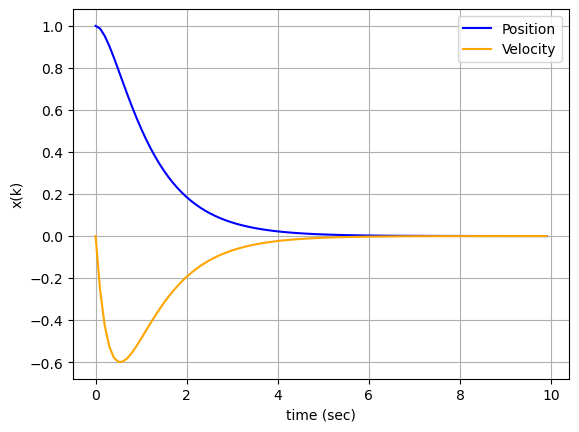

In [25]:
plotx(thist,xhist)

รูปที่ 3.3 แนววิถีของสถานะ $x$ จากตัวควบคุม LQR ในตัวอย่าง 3.2 (วิธี QP)

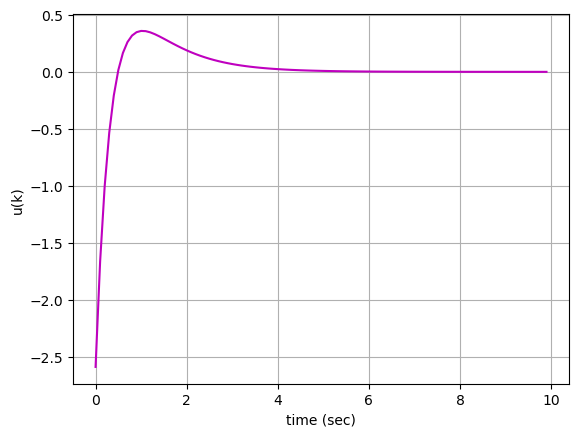

In [26]:
plotu(thist,uhist)

รูปที่ 3.4 แนววิถีของเอาต์พุตควบคุม $u$ จากตัวควบคุม LQR ในตัวอย่าง 3.2 (วิธี QP)

จากรูปที่ 3.3 และ 3.4 จะเห็นว่าสอดคล้องกับผลในตัวอย่าง 3.1 เมื่อเลือกค่าน้ำหนัก $Q, Q_N, R$ เหมือนกัน 
ทดลองปรับค่าน้ำหนักเพื่อดูการเปลี่ยนแปลงของแนววิถี เช่นเพิ่มน้ำหนักให้กับ $R$ จะเห็นว่าขนาดของเอาต์พุตควบคุมถูกจำกัดมากขึ้น 
ทำให้การเข้าสู่สถานะนิ่งช้ากว่าเดิม

### 3.2.3 การหาคำตอบโดยสมการริกคาติ

จากวิธีการยิงโดยอ้อมและวิธี QP จะพบว่าได้แนววิถีคำตอบในรูปของวงเปิด ทำให้ไม่สามารถประยุกต์ใช้เป็นตัวควบคุมป้อนกลับได้โดยตรง 
ดังนั้นในหัวข้อนี้จะลองเจาะลึกลงในสมการ (3.33) ที่มีลักษณะเป็นมากเลขศูนย์ 
และมีแบบรูปเฉพาะที่สามารถอนุพัทธ์เป็นระบบสมการที่มีประโยชน์อย่างยิ่งสำหรับการควบคุมเหมาะที่สุด 

เพื่อความง่ายในการศึกษา พิจารณา (3.33) สำหรับขั้นเวลาจำนวนน้อยเช่น 4 ขั้น และเมทริกซ์ $R, Q, Q_N, A, B$ เป็นค่าคงที่
$$
\left[\begin{array}{cccccccccc}
R & 0 & 0 & 0 & 0 & 0 & | & B^T & 0 & 0 \\
0 & Q & 0 & 0 & 0 & 0 & | & -I & A^T & 0 \\
0 & 0 & R & 0 & 0 & 0 & | & 0 & B^T & 0 \\
0 & 0 & 0 & Q & 0 & 0 & | & 0 & -I & A^T \\
0 & 0 & 0 & 0 & R & 0 & | & 0 & 0 & B^T \\
0 & 0 & 0 & 0 & 0 & Q_N & | & 0 & 0 & -I \\
-- & -- & -- & -- & -- & -- & | & -- & -- & -- \\
B & -I & 0 & 0 & 0 & 0 & | & 0 & 0 & 0 \\
0 & A & B & -I & 0 & 0 & | & 0 & 0 & 0 \\
0 & 0 & 0 & A & B & -I & | & 0 & 0 & 0
\end{array}\right]
\left[\begin{array}{c}
u_1 \\
x_2 \\
u_2 \\
x_3 \\
u_3 \\
x_4 \\
-- \\
\lambda_2 \\
\lambda_3 \\
\lambda_4
\end{array}\right] =
\left[\begin{array}{c}
0 \\
0 \\
0 \\
0 \\
0 \\
0 \\
-- \\
-Ax_1 \\
0 \\
0
\end{array}\right] \tag{3.34}
$$
สังเกตตัวชี้ของ $\lambda$ ที่เริ่มจาก 2 (ดูได้จากสมการ (3.3)) โดยโครงสร้างของระบบสมการเมทริกซ์นี้ เราสามารถใช้วิธีแทนค่าย้อนหลังเพื่อหาคำตอบ ซึ่งสอดคล้องกับวิธีโดยอ้อมในหัวข้อ 3.2.1 เริ่มจากแถวล่างสุดของเมทริกซ์บล็อก $H$ 
(แถวที่ 6 ของ (3.34)) เขียนเป็นสมการได้ดังนี้
$$
Q_Nx_4 - \lambda_4 = 0 \Rightarrow \lambda_4 = Q_Nx_4 \tag{3.35}
$$
แทนค่า $\lambda_4$ ลงในแถวที่ 5 ของ (3.34)
$$
Ru_3 + B^T\lambda_4 = Ru_3 + B^TQ_Nx_4 = 0
$$
$$
\Rightarrow Ru_3 + B^TQ_N(Ax_3 + Bu_3) = 0
$$
$$
\Rightarrow u_3 = -(R + B^TQ_NB)^{-1}B^TQ_NAx_3 \tag{3.36}
$$
จะเห็นว่า (3.36) อยู่ในรูปของการป้อนกลับสถานะ 
ซึ่งเป็นวัตถุประสงค์หนึ่งของการอนุพัทธ์นี้ในการจัดรูปแนววิถีวงเปิดเดิมเป็นระบบป้อนกลับ นิยาม
$$
K_3 \triangleq (R + B^TQ_NB)^{-1}B^TQ_NA \tag{3.37}
$$
เพีื่อเขียน (3.36) ให้กระชับขึ้นเป็น
$$
u_3 = -K_3x_3 \tag{3.38}
$$
ต่อมาพิจารณาแถวที่ 4 ของ (3.34)
$$
Qx_3 - \lambda_3 + A^T\lambda_4 = 0 \tag{3.39}
$$
แทนค่า $\lambda_4$ จาก (3.35)
$$
Qx_3 - \lambda_3 + A^TQ_Nx_4 = 0 \tag{3.40}
$$
แทนค่าพลวัต $x_4 = Ax_3 + Bu_3$ 
$$
Qx_3 - \lambda_3 + A^TQ_N(Ax_3+Bu_3) = 0 \tag{3.41}
$$
แทนค่า $u_3$ จาก (3.38) และจัดรูปสมการเพื่อหาคำตอบ $\lambda_3$
$$
\lambda_3 = (Q + A^TQ_N(A - BK_3))x_3 \tag{3.42}
$$
นิยาม 
$$
P_3 \triangleq (Q + A^TQ_N(A - BK_3)) \tag{3.43}
$$
โดยวิธีการนี้เราจะได้อัลกอริทึมวนซ้ำย้อนหลังสำหรับ $K$ และ $P$ ที่มีเค้าโครงดังนี้

<hr>

$$
P_N = Q_N
$$
วนซ้ำย้อนหลัง $k$ จาก $N-1$ ถึง $1$:
$$
K_k = (R + B^TP_{k+1}B)^{-1}B^TP_{k+1}A
$$
$$
P_k = Q + A^TP_{k+1}(A - BK_k)
$$

<hr>


เรียกว่า *สมการริกคาติ (Riccati equation)* หรือการวนซ้ำริกคาติ สรุปได้ว่าเราสามารถแก้ปัญหา QP 
โดยการคำนวณสมการริกคาติย้อนหลัง ตามด้วยการแผ่ไปข้างหน้าเพื่อคำนวณ $x_{1:N}$ และ $u_{1:N-1}$

เมื่อกำหนด $N, n, m$ คือจำนวนจุดตัวอย่าง ขนาดของสถานะ และขนาดอินพุตตามลำดับ 
เปรียบเทียบความซับซ้อนในการคำนวณ สำหรับปัญหา QP ทั่วไป ที่เมทริกซ์เป็นแบบหนาแน่น (dense)
จะมีความซับซ้อน $O([N(n+m)]^3)$ ในขณะที่การหาคำตอบโดยวิธีริกคาติคือ $O(N(n+m)^3)$ 
จะเห็นว่าเพิ่มตามค่า $N$ เป็นเชิงเส้นแทนที่จะเป็นกำลังสาม ดังนั้นสามารถลดความซับซ้อนในการคำนวณลงได้

ข้อได้เปรียบที่เด่นชัดกว่าคือการจัดรูปปัญหาเป็นนโยบายการป้อนกลับ (feedback policy) ทำให้เราสามารถเปลี่ยนค่าสถานะเริ่มต้น $x_0$ 
ได้ตามต้องการ ทั้งยังสามารถขจัดการรบกวน (noise/disturbance) ซึ่งเป็นคุณสมบัติที่ต้องการสำหรับระบบป้อนกลับ 
ซึ่งจะได้แสดงให้เห็นในตัวอย่าง

**ตัวอย่าง 3.3** เรายังคงทดสอบบนระบบปริพันธ์คู่ (3.24) โดยใช้ข้อมูลเดิมจากตัวอย่างก่อนหน้านี้ แต่ในครั้งนี้จะคำนวณตัวควบคุม LQR 
โดยใช้การวนซ้ำริกคาติ โค้ดในส่วนต้นของตัวอย่างจะเป็นเหมือนกับในตัวอย่าง 3.1 
เพื่อความสะดวกในการรันเซลล์จะคัดลอกโค้ดทั้งหมดอีกครั้งหนึ่ง
(ในตัวอย่างนี้ไม่จำเป็นต้องใช้แพ็กเกจ scipy.sparse 
เนื่องจากไม่มีการคำนวณโดยใช้เมทริกซ์มากเลขศูนย์)

In [27]:
import numpy as np 
from numpy.linalg import norm, solve
import matplotlib.pyplot as plt 

In [28]:
# discrete dynamics
h = 0.1  # time step
A = np.array([[1,h],[0,1]])
B = np.array([0.5*h*h, h]).reshape(2,1)

In [29]:
n = 2     # number of state
m = 1     # number of controls
Tfinal = 10.0 # final time #try larger values
N = int(Tfinal/h)+1    # number of time steps
thist = np.arange(0,h*(N-1),h)

In [30]:
# Cost weights
Q = 1.0*np.eye(2)
R = np.array([[0.1]])
Qn = 1.0*np.eye(2)

In [31]:
def J(xhist, uhist):
    xend = xhist[:,-1]
    cost = 0.5*xend.T@Qn@xend
    for k in range(N-1):
        xk = xhist[:,k]
        uk = uhist[k]
        cost = cost + 0.5*xk.T@Q@xk + 0.5*uk*R*uk
    return cost

In [32]:
def plotx(t,x):
    plt.figure()
    plt.plot(t,x[0,0:N-1],"b-",thist,xhist[1,0:N-1],'orange')
    plt.xlabel("time (sec)")
    plt.ylabel("x(k)")
    plt.legend(["Position","Velocity"])
    plt.grid(True)
    plt.show()   

def plotu(t,u):
    plt.figure()
    plt.plot(t,u,"m-")
    plt.xlabel("time (sec)")
    plt.ylabel("u(k)")
    plt.grid(True)
    plt.show()      

In [33]:
# Initial conditions
x0 = np.array([[1.0],[0]])

นิยามเมทริกซ์ $P, K$ เป็นเทนเซอร์ 3 มิติ โดยมิติที่ 3 คือการเปลี่ยนแปลงตามขั้นเวลา $k$

In [34]:
P = np.zeros((n,n,N))
K = np.zeros((m,n,N-1))
P[:,:,N-1] = Qn

เขียนโค้ดการวนซ้ำย้อนหลังจากเวลาปลายมายังต้น เพื่อคำนวณค่า $K_k$ และ $P_k$ ตามเค้าโครงอัลกอริทึมด้านบน

In [35]:
# Backward Riccati recursion
for k in range(N-1,0,-1):
    K[:,:,k-1] = solve(R + B.T@P[:,:,k]@B,B.T@P[:,:,k]@A)
    P[:,:,k-1] = Q + A.T@P[:,:,k]@(A-B@K[:,:,k-1])

หลังจากนั้นแผ่ตามพลวัตด้านหน้าจากค่าเริ่มต้น $x_0$ เพื่อคำนวณค่า $x_k, u_k$

In [36]:
# Forward rollout starting at x0 
xhist = np.zeros((n,N))
xhist[:,[0]] = x0
uhist = np.zeros((m,N-1))
for k in range(N-1):
    uhist[:,[k]] = -K[:,:,k]@xhist[:,[k]]
    xhist[:,[k+1]] = A@xhist[:,[k]] + B*uhist[:,[k]]

พล็อตค่าแนววิถี $x_k$ และ $u_k$ ได้ดังในรูปที่ 3.5 และ 3.6 ตามลำดับ 
จะเห็นว่าหากใช้เมทริกซ์น้ำหนักค่าเท่ากัน ผลไม่แตกต่างจาก 2 ตัวอย่างก่อนหน้า

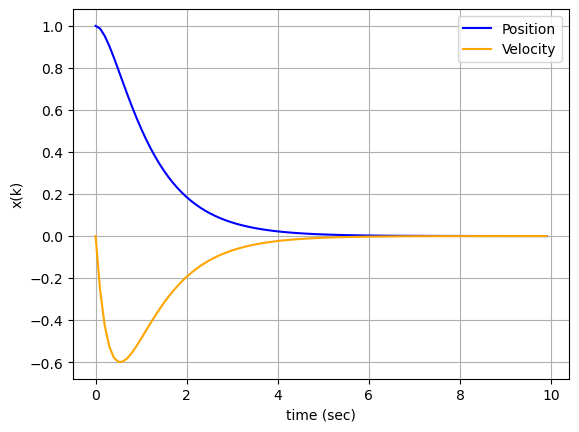

In [37]:
plotx(thist,xhist)

รูปที่ 3.5 แนววิถีของสถานะ $x$ จากตัวควบคุม LQR ในตัวอย่าง 3.3 (วิธีวนซ้ำริกคาติ)

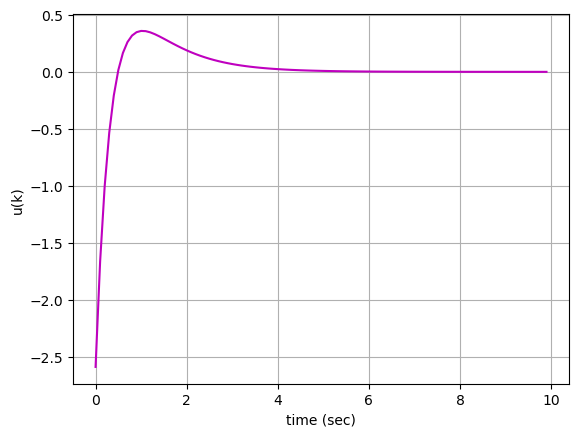

In [38]:
uhist= uhist.flatten()
plotu(thist,uhist)

รูปที่ 3.6 แนววิถีของเอาต์พุตควบคุม $u$ จากตัวควบคุม LQR ในตัวอย่าง 3.3 (วิธีวนซ้ำริกคาติ)

เมื่อคำนวณมูลค่าโดยฟังก์ชัน J() จะได้ประมาณเท่ากับตัวอย่างก่อนหน้าเมื่อใช้เมทริกซ์น้ำหนักค่าเท่ากัน

In [39]:
J(xhist,uhist).item()

6.658612208961312

ข้อได้เปรียบสำคัญของวิธีวนซ้ำริกคาติคือการจัดรูปตัวควบคุม LQR เป็นการป้อนกลับสถานะ 
ทำให้เราสามารถแผ่พลวัตข้างหน้าจากจุดเริ่มต้นใดๆ นอกจากนั้นยังสามารถเพิ่มการรบกวนให้กับระบบ 
โดยหากจัดรูปปัญหา LQR ได้เหมาะสมทำให้ได้ระบบป้อนกลับที่เสถียร ผลตอบสนองจะลู่เข้าสู่จุดสมดุลได้ 
โดยมีค่าผิดพลาดขึ้นกับความแรงของสัญญาณรบกวนที่สร้างขึ้น 

ทดสอบโดยเพิ่มค่าผิดพลาดแบบสุ่มให้กับค่าเริ่มต้น และเพิ่มการรบกวนให้พลวัตของระบบปริพันธ์คู่ดังโค้ดในเซลล์ด้านล่าง
ค่าของ $x_0$ และการรบกวนจะแตกต่างกันไปในแต่ละครั้งของการรันเซลล์ รูปที่ 3.7 และ 3.8 
แสดงแนววิถีของสถานะและตัวควบคุมภายใต้การรบกวนและค่าสถานะที่เปลี่ยนแปลง

In [40]:
# Forward rollout with random noise and arbitrary initial condition
xhist = np.zeros((n,N))
xhist[:,[0]] = x0 + 10*np.random.rand(2,1) # change in x0 is significant
uhist = np.zeros((m,N-1))
for k in range(N-1):
    uhist[:,[k]] = -K[:,:,k]@xhist[:,[k]]
    xhist[:,[k+1]] = A@xhist[:,[k]] + B*uhist[:,[k]] + 0.05*np.random.rand(2,1) 
    # adjust noise intensity as desired

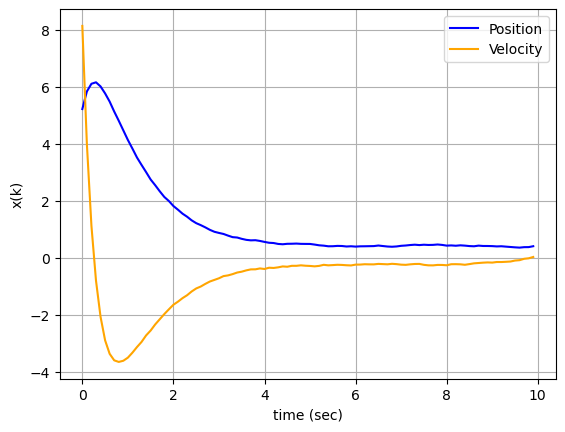

In [41]:
plotx(thist,xhist)

รูปที่ 3.7 แนววิถีของสถานะ $x$ จากตัวควบคุม LQR เมื่อค่าเริ่มต้นเป็นค่าสุ่มและเพิ่มการรบกวนกับพลวัต

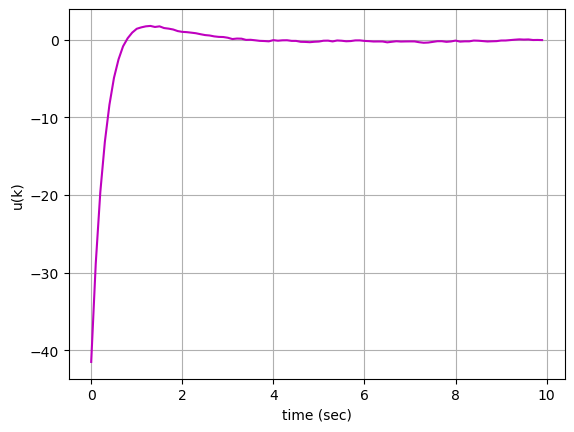

In [42]:
uhist= uhist.flatten()
plotu(thist,uhist)

รูปที่ 3.8 แนววิถีของ $u$ จากตัวควบคุม LQR เมื่อค่าเริ่มต้นเป็นค่าสุ่มและเพิ่มการรบกวนกับพลวัต

### 3.2.4 ตัวควบคุม LQR แบบแนวนอนอนันต์

ความหมายของตัวควบคุม LQR แบบแนวนอนอนันต์ (infinite horizon) 
คือเมื่อเราขยายแกนเวลาออกไปไม่มีที่สิ้นสุด ซึ่งสำหรับปัญหา LQR ที่ไม่แปรตามเวลา 
ค่าของ $P_k$ และ $K_k$ ที่คำนวณโดยการวนซ้ำริกคาติจะลู่เข้าสู่ค่าคงที่ $P_\infty, K_\infty$ 
ซึ่งสามารถแสดงตัวอย่างได้จากค่าที่เก็บไว้ในตัวอย่าง 3.3 รูปที่ 3.9 แสดงค่าของตัวควบคุมป้อนกลับสถานะ $K_k$ 
เทีียบกับเวลา โดยค่าเริ่มต้นจะอยู่ที่เวลาสิ้นสุด 
แต่เมื่อคำนวณวนซ้ำย้อนหลังไปช่วงเวลาหนึ่งจะเริ่มเห็นการลู่เข้าสู่ค่าคงที่ 

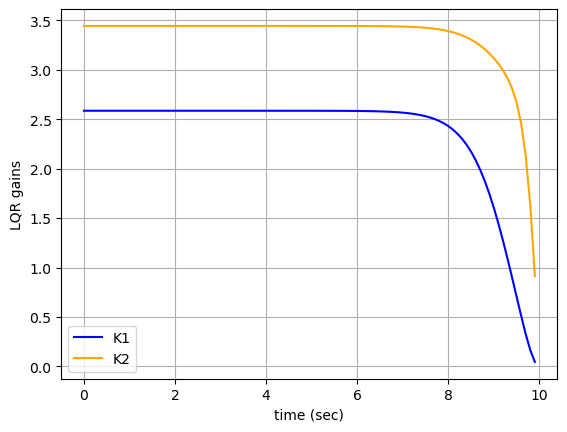

In [43]:
plt.figure()
plt.plot(thist,K[0,0,:],'b')
plt.plot(thist,K[0,1,:],'orange')
plt.legend(['K1','K2'])
plt.xlabel('time (sec)')
plt.ylabel('LQR gains')
plt.grid(True)
plt.show()

รูปที่ 3.9 การลู่เข้าสู่ค่าคงที่ของ $K_k$ จากการวนซ้ำริกคาติย้อนหลัง

จากรูปสมการริกคาติเมื่อกำหนด $P_{k+1} = P_k = P_\infty, K_{k+1} = K_k = K_\infty$ 
จะพบว่าสามารถคำนวณค่าได้โดยใช้วิธีนิวตันหรือวิธีจุดตรึง แต่เราไม่จำเป็นต้องเขียนอัลกอริทึมเอง 
เพราะแพ็กเกจด้านระบบควบคุมในภาษาคอมพิวเตอร์ต่างๆ จะมีเครื่องมือนี้ให้แล้ว 
เนื่องจาก LQR เป็นปัญหาควบคุมที่สำคัญและใช้งานอย่างแพร่หลาย เราจะยกตัวอย่างแพ็กเกจ 
Control Systems Library ในภาษาไพทอน (หากมิได้ติดตั้งต้องรัน !pip install control ก่อน) 

In [44]:
import control as ctl
ctl.__version__

'0.10.1'

ใช้เมธอด ctl.dlqr() จากแพ็กเกจ เพื่อสังเคราะห์ตัวควบคุม LQR 

In [46]:
# Compute infinite-horizon K matrix using Control Systems library
Kinf = ctl.dlqr(A,B,Q,R)
Kinf = Kinf[0]
Kinf

array([[2.5857009 , 3.44343592]])

ลองเปรียบเทียบกับค่า $K_k$ ที่ลู่เข้าแล้วจากการวนซ้ำริกคาติในตัวอย่างที่ 3.3 
พบว่ามีความแตกต่างกันน้อยมาก

In [47]:
norm(K[:,:,0] - Kinf)

7.107529720652474e-09

เมื่อทดลองใช้ตัวควบคุม Kinf ในการแผ่พลวัตข้างหน้าและพล็อตแนววิถีในรูปที่ 
3.10, 3.11 เมื่อเปรียบเทียบกับผลในรูปที่ 3.5, 3.6 พบว่าแทบไม่มีความแตกต่างกัน

In [48]:
# Forward rollout with constant K
xhist = np.zeros((n,N))
xhist[:,[0]] = x0 
uhist = np.zeros((m,N-1))
for k in range(N-1):
    uhist[:,[k]] = -Kinf@xhist[:,[k]]
    xhist[:,[k+1]] = A@xhist[:,[k]] + B*uhist[:,[k]] 

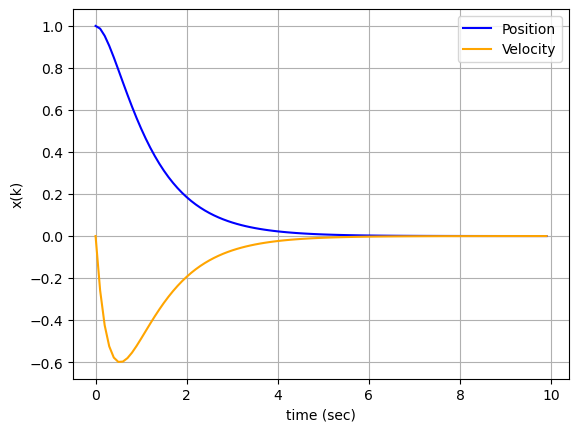

In [49]:
plotx(thist,xhist)

รูปที่ 3.10 แนววิถีของสถานะ $x$ จากตัวควบคุมที่สังเคราะห์โดย dlqr()

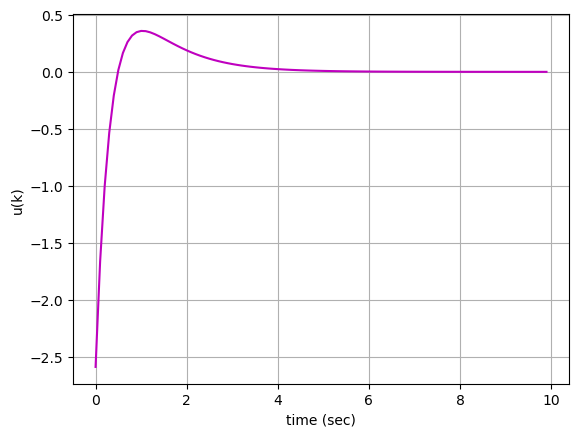

In [50]:
uhist= uhist.flatten()
plotu(thist,uhist)

รูปที่ 3.11 แนววิถีของเอาต์พุตควบคุม $u$ จากตัวควบคุมที่สังเคราะห์โดย dlqr()

## บรรณานุกรม

1. Z. Manchester et.al. [16-745 Optimal Control & Reinforcement Learning, 
Course materials](https://optimalcontrol.ri.cmu.edu/#learning-resources), Carnegie Mellon University. 2024,2025.

2. R. Tedrake. [Underactuated Robotics: Algorithms for Walking, Running, Swimming, Flying, and Manipulation (Course Notes for MIT 6.832)](https://underactuated.csail.mit.edu). 2023. 

3. D.P. Bertsekas. Reinforcement Learning and Optimal Control. MIT Press. 2019.


<div align="center">
<img src="https://raw.githubusercontent.com/dewdotninja/sharing-github/refs/heads/master/dewninja_logo50.jpg" alt="dewninja"/>
</div>
<div align="center">dew.ninja 2025</div>